# Recommended System part 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
%matplotlib inline

In [4]:
columns_names=['user_id','item_id','rating','timestamp']

In [5]:
#df=pd.read_csv('ratings.csv',sep='\t',names=columns_names)

In [6]:
df=pd.read_csv('ratings.csv')

In [7]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [8]:
movie_titles=pd.read_csv('movies.csv')

In [9]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
df=pd.merge(df,movie_titles,on='movieId')

In [11]:
df.head(100)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
95,611,2,5.0,829414367,Jumanji (1995),Adventure|Children|Fantasy
96,630,2,4.5,1089802655,Jumanji (1995),Adventure|Children|Fantasy
97,635,2,4.0,1035062043,Jumanji (1995),Adventure|Children|Fantasy
98,637,2,3.5,1356091699,Jumanji (1995),Adventure|Children|Fantasy


In [12]:
sns.set_style('white')

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Still Bill (2009)                                 5.0
Red's Dream (1987)                                5.0
Beneath Hill 60 (2010)                            5.0
Silent World, The (Le monde du silence) (1956)    5.0
Cobra Verde (1987)                                5.0
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
Name: rating, dtype: int64

In [15]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [16]:
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.875
$5 a Day (2008),3.300
'71 (2014),3.000
'Hellboy': The Seeds of Creation (2004),3.125
'Neath the Arizona Skies (1934),3.500


In [17]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [18]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.875,8
$5 a Day (2008),3.300,5
'71 (2014),3.000,1
'Hellboy': The Seeds of Creation (2004),3.125,4
'Neath the Arizona Skies (1934),3.500,2


<AxesSubplot:>

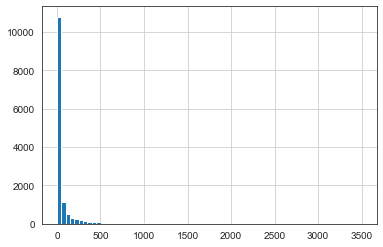

In [19]:
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

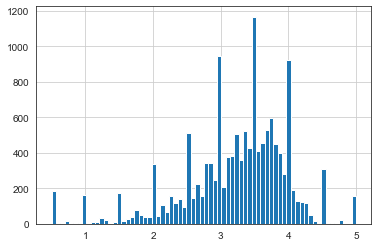

In [20]:
ratings['rating'].hist(bins=70)

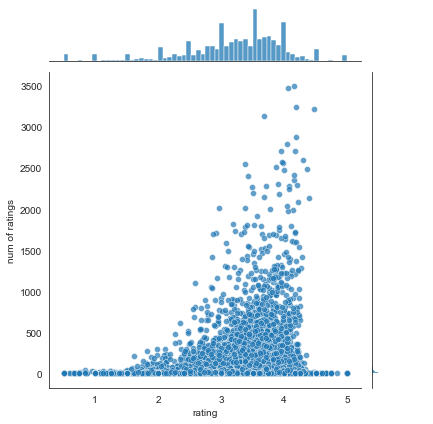

In [23]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.7)

# Recommended system part 2

In [24]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [25]:
moviemat=df.pivot_table(index='userId',columns='title',values='rating')

In [26]:
moviemat.head()

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.153516,3498
Forrest Gump (1994),4.056530,3476
"Silence of the Lambs, The (1991)",4.184786,3247
"Shawshank Redemption, The (1994)",4.469994,3216
Jurassic Park (1993),3.680409,3129
Star Wars: Episode IV - A New Hope (1977),4.189457,2874
Braveheart (1995),4.038228,2799
Terminator 2: Judgment Day (1991),3.948359,2711
"Matrix, The (1999)",4.176340,2705


In [28]:
pulpfiction_user_ratings=moviemat['Pulp Fiction (1994)']
jurassicpark_user_ratings=moviemat['Jurassic Park (1993)']

In [29]:
pulpfiction_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [30]:
similar_to_pulpfiction=moviemat.corrwith(pulpfiction_user_ratings)

C:\Users\satya\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\satya\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
similar_to_jurassicpark=moviemat.corrwith(jurassicpark_user_ratings)

In [32]:
corr_pulpfiction=pd.DataFrame(similar_to_pulpfiction,columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)

In [33]:
corr_pulpfiction.head()

,Correlation
title,
'Round Midnight (1986),0.833333
'Salem's Lot (2004),0.683130
'Til There Was You (1997),-0.072479
"'burbs, The (1989)",-0.071418
(500) Days of Summer (2009),0.066468


In [34]:
corr_pulpfiction.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Hired Hand, The (1971)",1.0
Somebody is Waiting (1996),1.0
Sombre (1998),1.0
Louis C.K.: Live at The Comedy Store (2015),1.0
Smile (2005),1.0
Love in the Time of Cholera (2007),1.0
"Children of Huang Shi, The (2008)",1.0
"Lower Depths, The (Donzoko) (1957)",1.0
Lymelife (2008),1.0


In [35]:
corr_pulpfiction=corr_pulpfiction.join(ratings['num of ratings'])

In [36]:
corr_pulpfiction.head()

,Correlation,num of ratings
title,,
'Round Midnight (1986),0.833333,7
'Salem's Lot (2004),0.683130,7
'Til There Was You (1997),-0.072479,38
"'burbs, The (1989)",-0.071418,163
(500) Days of Summer (2009),0.066468,271


In [37]:
corr_pulpfiction[corr_pulpfiction['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,3498
Reservoir Dogs (1992),0.535822,1414
Kill Bill: Vol. 2 (2004),0.399329,1006
Sexy Beast (2000),0.391804,120
Django Unchained (2012),0.389830,220


In [38]:
corr_jurassicpark=pd.DataFrame(similar_to_jurassicpark,columns=['Correlation'])

In [39]:
corr_jurassicpark.head()

,Correlation
title,
"""Great Performances"" Cats (1998)",NaN
$5 a Day (2008),NaN
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),0.944911
'Neath the Arizona Skies (1934),NaN


In [40]:
corr_jurassicpark.dropna(inplace=True)

In [41]:
corr_jurassicpark=corr_jurassicpark.join(ratings['num of ratings'])

In [42]:
corr_jurassicpark[corr_jurassicpark['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,3129
"Lost World: Jurassic Park, The (1997)",0.610219,779
"Mist, The (2007)",0.509456,102
Flashdance (1983),0.508246,185
Child's Play (1988),0.491470,134


<AxesSubplot:>

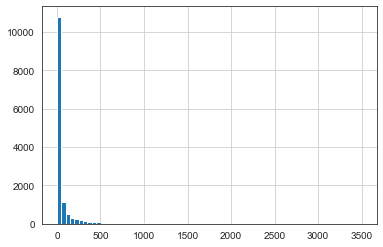

In [44]:
ratings['num of ratings'].hist(bins=70)